In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
from scipy.stats.mstats import winsorize
import math
from collections import namedtuple
import sys
import scipy

In [2]:
from filterpy.discrete_bayes import update
from filterpy.discrete_bayes import predict
from ipywidgets import interact, IntSlider
from filterpy.discrete_bayes import normalize

In [4]:
rc_0 = pd.read_csv('data room Constant (Reza).csv')

In [5]:
t1_p = rc_0['Topic1']

In [6]:
t1 = list(t1_p)
print(t1)
maximum = max(t1)
minimum = min(t1)
bins = maximum - minimum
print(bins)

[0, 0, -90, -90, -90, -90, -77, -77, -77, -77, -75, -75, -76, -76, -76, -76, -76, -77, -75, -75, -78, -78, -76, -76, -76, -75, -75, -77, -77, -77, -77, -77, -77, -77, -77, -77, -77, -78, -78, -74, -74, -77, -77, -78, -78, -78, -78, -77, -77, -77, -77, -77, -76, -76, -77, -77, -77, -77, -76, -76, -75, -75, -77, -77, -75, -75, -75, -75, -77, -77, -77, -77, -77, -77, -77, -76, -76, -74, -74, -77, -77, -78, -78, -77, -77, -77, -77]
90


In [7]:
t1 = np.array(t1)
mean = np.mean(t1)
med = np.median(t1)
# med1 = statistics.median(t1)
mod = statistics.mode(t1)
pdf = statistics.pstdev(t1)
print(mean, med, mod, pdf)

-75.36781609195403 -77.0 -77 11.916375287812984


In [8]:
print(t1.shape)
print(t1.ndim)
print(t1.dtype)

(87,)
1
int32


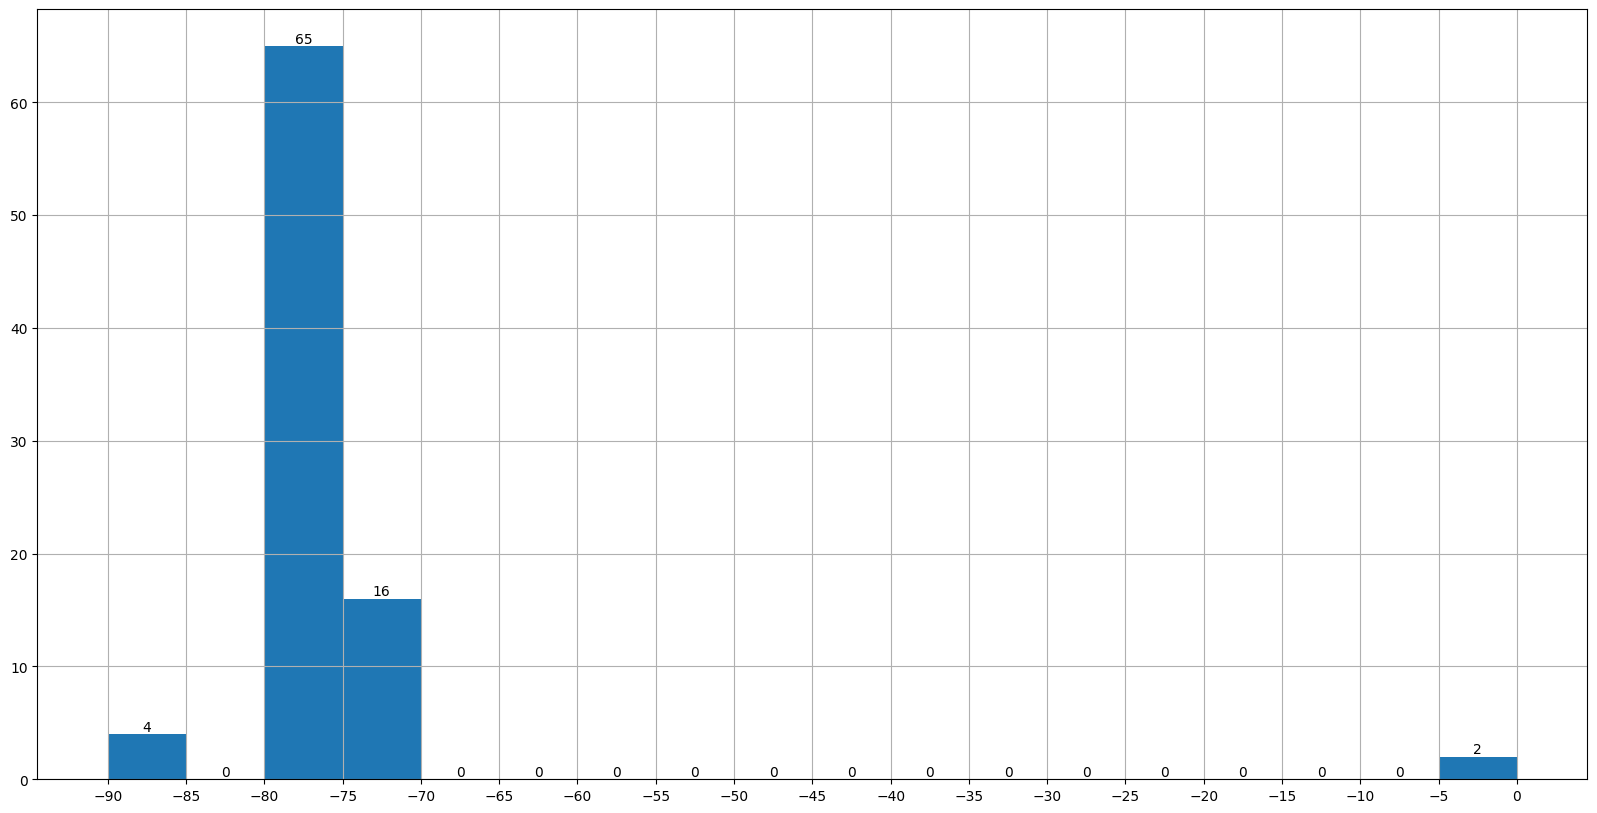

In [140]:

fig, ax = plt.subplots(figsize=(20,10))
counts, edges, bars = ax.hist(rc_0.Topic1,bins=18)
# Set the ticks to be at the edges of the bins.
ax.set_xticks(edges)
# Set the xaxis's tick labels to be formatted with 1 decimal place...
# ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
plt.bar_label(bars)
plt.grid(True)

plt.show()

In [193]:
t1 = list(t1_p)
t1_d = t1.copy()
c = t1_d.count(0)
for i in range(c):
    t1_d.remove(0)

print(t1_d)

[-90, -90, -90, -90, -77, -77, -77, -77, -75, -75, -76, -76, -76, -76, -76, -77, -75, -75, -78, -78, -76, -76, -76, -75, -75, -77, -77, -77, -77, -77, -77, -77, -77, -77, -77, -78, -78, -74, -74, -77, -77, -78, -78, -78, -78, -77, -77, -77, -77, -77, -76, -76, -77, -77, -77, -77, -76, -76, -75, -75, -77, -77, -75, -75, -75, -75, -77, -77, -77, -77, -77, -77, -77, -76, -76, -74, -74, -77, -77, -78, -78, -77, -77, -77, -77]


In [247]:
a = statistics.pstdev(t1_d)
a1 = statistics.stdev(t1_d)
a2 = statistics.variance(t1_d)

b1 = np.mean(t1)
b2 = np.median(t1)
# med1 = statistics.median(t1)
b3 = statistics.mode(t1)

print(a, a1, a2)
print(b1, b2, b3)

3.0337433338891664 3.0517479034327923 9.313165266106443
-75.36781609195403 -77.0 -77


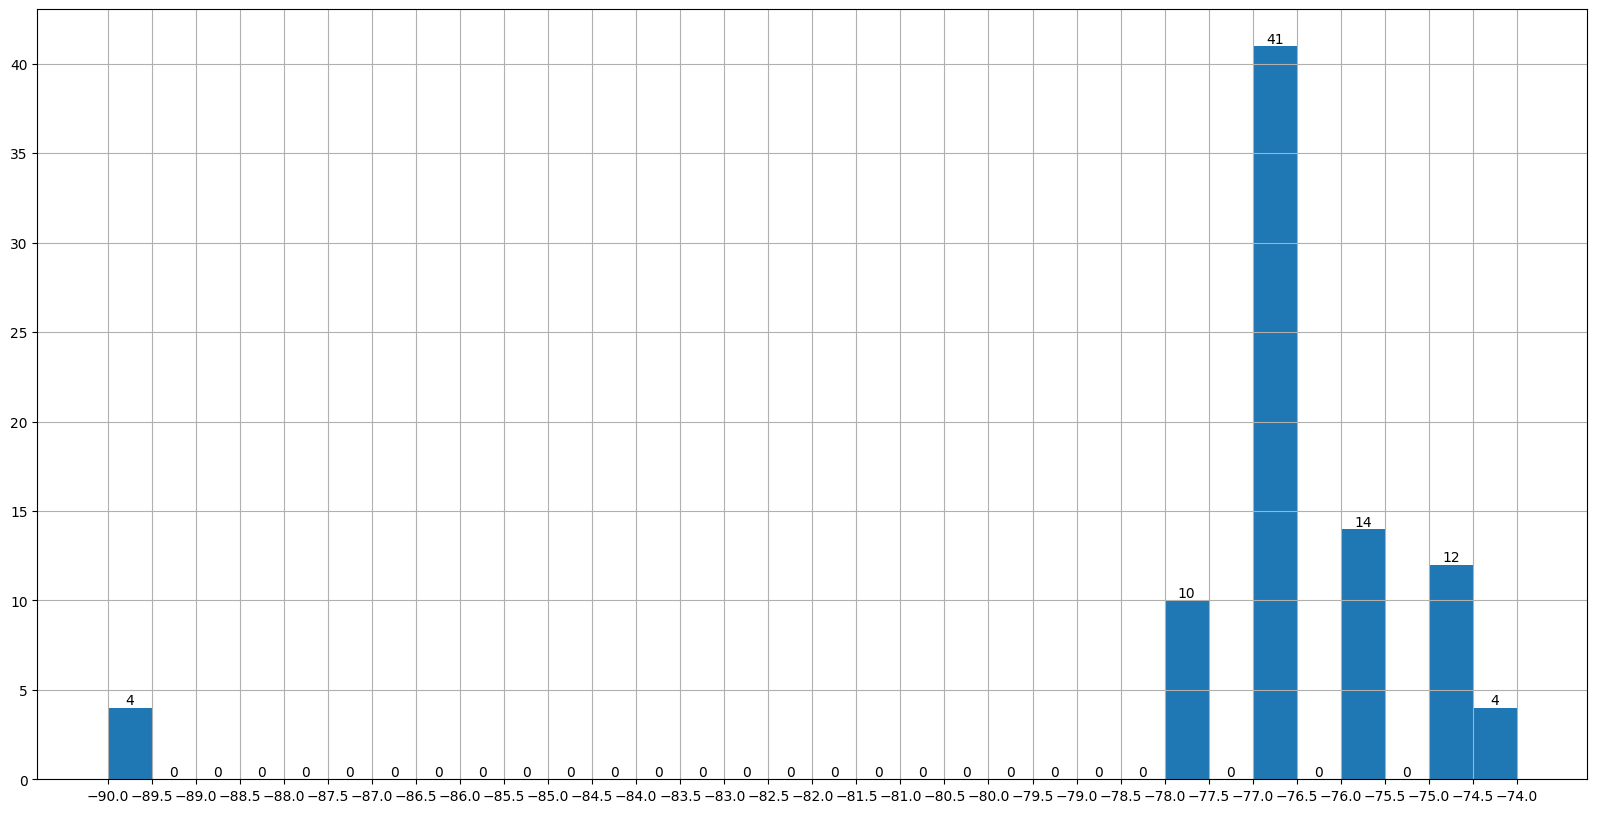

In [200]:
maximum = max(t1_d)
minimum = min(t1_d)
bins = maximum - minimum

fig, ax = plt.subplots(figsize=(20,10))
counts, edges, bars = ax.hist(t1_d,bins=2*bins)
# Set the ticks to be at the edges of the bins.
ax.set_xticks(edges)
# Set the xaxis's tick labels to be formatted with 1 decimal place...
# ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
plt.bar_label(bars)
plt.grid(True)

plt.show()

In [2]:
from filterpy.discrete_bayes import update
from filterpy.discrete_bayes import predict
from ipywidgets import interact, IntSlider
from filterpy.discrete_bayes import normalize

In [3]:
# def lh_hallway(hall, z, z_prob):
#     """ compute likelihood that a measurement matches
#     positions in the hallway."""
    
#     try:
#         scale = z_prob / (1. - z_prob)
#     except ZeroDivisionError:
#         scale = 1e8

#     likelihood = np.ones(len(hall))
#     likelihood[hall==z] *= scale
#     return likelihood

In [6]:
def lh_hallway(hall, x, y, z_prob): # z is (x,y)   and   z_prob and scale for (x,y) is 20% and scale for range 1 is: 5% and for range 2 is: 2.5%
    """ compute likelihood that a measurement matches
    positions in the hallway."""
    
    w = hall.shape[0]
    l = hall.shape[1]
    scale = z_prob*100
    scale_1 = ((1-z_prob)/(2*8))*100
    scale_2 = ((1-z_prob)/(2*16))*100
    likelihood = np.ones((w,l))

    x -= 1
    y -= 1

    likelihood[x,y] *= scale

    for i in range(x-1,x+1):
        for j in range(y-1,y+2):
            if i == x and j == y:
                continue
            else:
                likelihood[i,j] *= scale_1
    
    for i in (x-2,x+2):
        for j in range(y-2,y+3):
            likelihood[i,j] *= scale_2
    for i in (y-2,y+2):
        for j in range(x-1,x+2):
            likelihood[j,i] *= scale_2


    '''
    try:
        scale = z_prob / (1. - z_prob)
    except ZeroDivisionError:
        scale = 1e8
    '''
    return likelihood

In [34]:
# def perfect_predict(belief, move):
#     """ move the position by `move` spaces, where positive is 
#     to the right, and negative is to the left
#     """
#     n = len(belief)
#     result = np.zeros(n)
#     for i in range(n):
#         result[i] = belief[(i-move) % n]
#     return result

In [ ]:
# np.set_printoptions(threshold=sys.maxsize)
# np.set_printoptions(threshold=5)

In [7]:
hallway = np.ones((40,40))  # our hall is 8x8m and the increment is 20cm
prior = hallway * (1/40)

In [508]:
# posterior = update(likelihood, prior)

In [8]:
def update_array(likelihood,prior):
    likelihood_0 = likelihood.reshape(1600,)
    prior_0 = prior.reshape(1600,)
    posterior_0 = (likelihood_0*prior_0)
    posterior_1 = normalize(posterior_0)
    # posterior_1 = posterior_0.reshape(1600,)
    posterior = posterior_1.reshape(40,40)
    return posterior

In [9]:
likelihood = lh_hallway(hall=hallway, x=3, y=3, z_prob=0.2)
posterior = update_array(likelihood, prior)

In [10]:
kernel = [[.7],[.2],[.1]]
# print(prior)
# prior = predict(posterior, 1, kernel)
prior = posterior.copy()
# print(prior)

[[0.00150331 0.00300661 0.01202646 0.00300661 0.00150331 0.00060132
  0.00060132 0.00060132 0.00060132 0.00060132 0.00060132 0.00060132
  0.00060132 0.00060132 0.00060132 0.00060132 0.00060132 0.00060132
  0.00060132 0.00060132 0.00060132 0.00060132 0.00060132 0.00060132
  0.00060132 0.00060132 0.00060132 0.00060132 0.00060132 0.00060132
  0.00060132 0.00060132 0.00060132 0.00060132 0.00060132 0.00060132
  0.00060132 0.00060132 0.00060132 0.00060132]
 [0.00150331 0.00060132 0.00060132 0.00060132 0.00150331 0.00060132
  0.00060132 0.00060132 0.00060132 0.00060132 0.00060132 0.00060132
  0.00060132 0.00060132 0.00060132 0.00060132 0.00060132 0.00060132
  0.00060132 0.00060132 0.00060132 0.00060132 0.00060132 0.00060132
  0.00060132 0.00060132 0.00060132 0.00060132 0.00060132 0.00060132
  0.00060132 0.00060132 0.00060132 0.00060132 0.00060132 0.00060132
  0.00060132 0.00060132 0.00060132 0.00060132]]


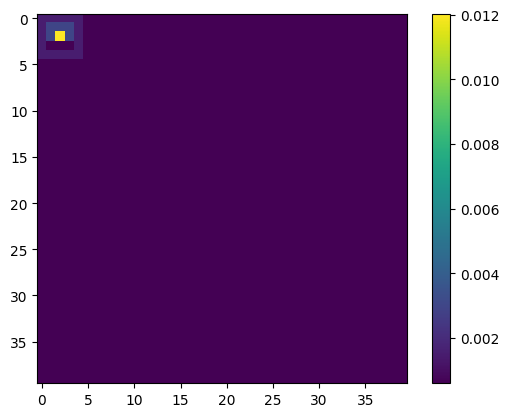

In [15]:
# print(posterior)
print(posterior[1:4][1:4])
f = posterior
plt.imshow(f, interpolation="nearest", origin="upper")
plt.colorbar()
plt.show()

In [513]:
# hallway = np.array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0])
# prior = np.array([.1] * 10)


# book_plots.plot_prior_vs_posterior(prior, posterior, ylim=(0,.5))
# kernel=[.1, .8, .1]
# kernel = (.1, .8, .1)
# kernel = [[.7],[.2],[.1]]

# prior = predict(posterior, 1, kernel)
likelihood = lh_hallway(hallway, x=4, y=4, z_prob=.2)
posterior = update_array(likelihood, prior)

In [514]:
print(posterior)

[[0.00134517 0.00134517 0.00134517 ... 0.00053807 0.00053807 0.00053807]
 [0.00134517 0.00672585 0.00672585 ... 0.00053807 0.00053807 0.00053807]
 [0.00134517 0.00672585 0.05380683 ... 0.00053807 0.00053807 0.00053807]
 ...
 [0.00053807 0.00053807 0.00053807 ... 0.00053807 0.00053807 0.00053807]
 [0.00053807 0.00053807 0.00053807 ... 0.00053807 0.00053807 0.00053807]
 [0.00053807 0.00053807 0.00053807 ... 0.00053807 0.00053807 0.00053807]]


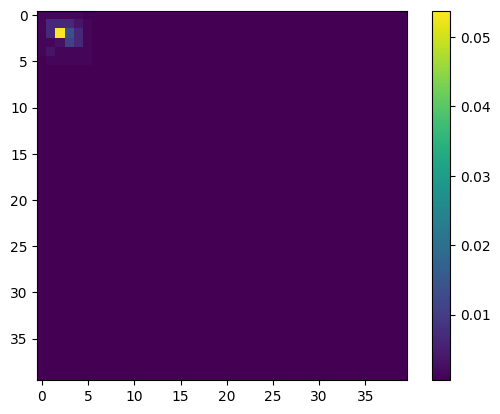

In [515]:
plt.imshow(posterior, interpolation="nearest", origin="upper")
plt.colorbar()
plt.show()

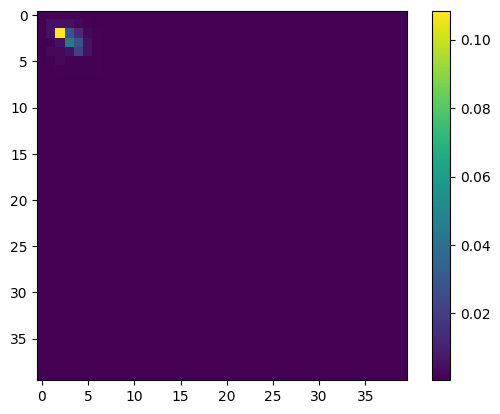

In [516]:
# kernel = [[.7],[.2],[.1]]
# prior = predict(posterior, 1, kernel)
prior = posterior.copy()
likelihood = lh_hallway(hallway, x=5, y=5, z_prob=.2)
posterior = update_array(likelihood, prior)

plt.imshow(posterior, interpolation="nearest", origin="upper")
plt.colorbar()
plt.show()

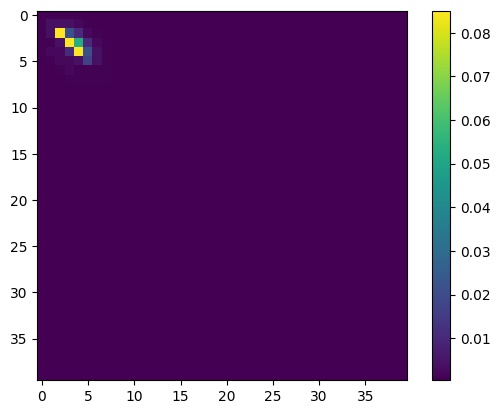

In [517]:
# kernel = [[.7],[.2],[.1]]
# prior = predict(posterior, 1, kernel)
prior = posterior.copy()
likelihood = lh_hallway(hallway, x=6, y=6, z_prob=.2)
posterior = update_array(likelihood, prior)

plt.imshow(posterior, interpolation="nearest", origin="upper")
plt.colorbar()
plt.show()

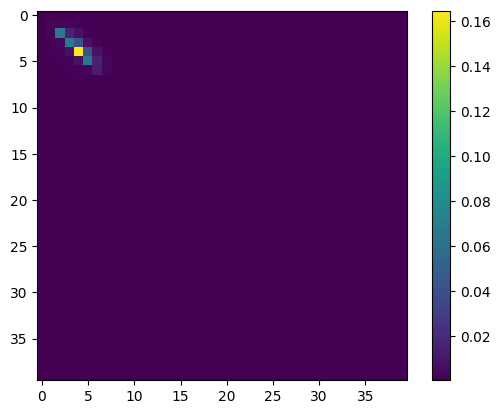

In [518]:
# kernel = [[.7],[.2],[.1]]
# prior = predict(posterior, 1, kernel)
prior = posterior.copy()
likelihood = lh_hallway(hallway, x=7, y=7, z_prob=.2)
posterior = update_array(likelihood, prior)

plt.imshow(posterior, interpolation="nearest", origin="upper")
plt.colorbar()
plt.show()

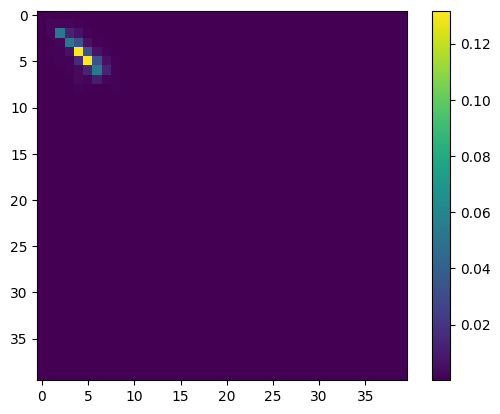

In [519]:
# kernel = [[.7],[.2],[.1]]
# prior = predict(posterior, 1, kernel)
prior = posterior.copy()
likelihood = lh_hallway(hallway, x=8, y=7, z_prob=.2)
posterior = update_array(likelihood, prior)

plt.imshow(posterior, interpolation="nearest", origin="upper")
plt.colorbar()
plt.show()

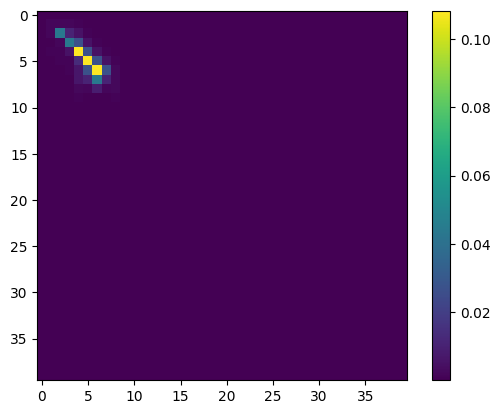

In [520]:
# kernel = [[.7],[.2],[.1]]
# prior = predict(posterior, 1, kernel)
prior = posterior.copy()
likelihood = lh_hallway(hallway, x=9, y=7, z_prob=.2)
posterior = update_array(likelihood, prior)

plt.imshow(posterior, interpolation="nearest", origin="upper")
plt.colorbar()
plt.show()

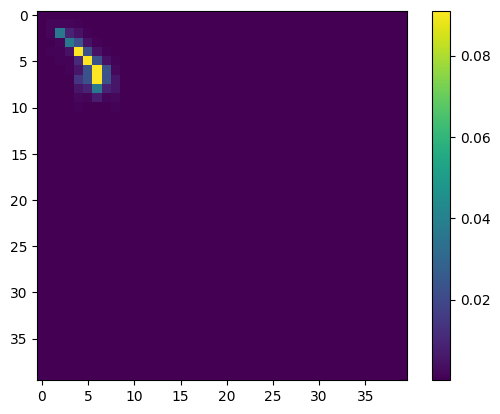

In [521]:
# kernel = [[.7],[.2],[.1]]
# prior = predict(posterior, 1, kernel)
prior = posterior.copy()
likelihood = lh_hallway(hallway, x=10, y=7, z_prob=.2)
posterior = update_array(likelihood, prior)

plt.imshow(posterior, interpolation="nearest", origin="upper")
plt.colorbar()
plt.show()

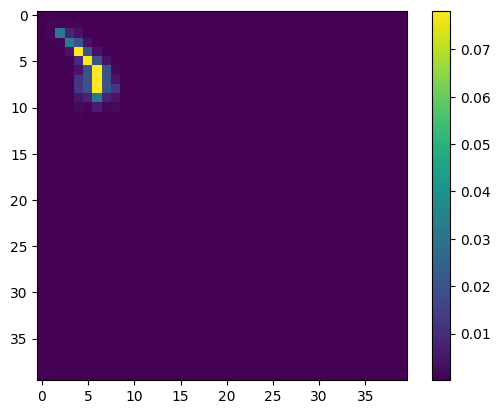

In [522]:
# kernel = [[.7],[.2],[.1]]
# prior = predict(posterior, 1, kernel)
prior = posterior.copy()
likelihood = lh_hallway(hallway, x=11, y=7, z_prob=.2)
posterior = update_array(likelihood, prior)

plt.imshow(posterior, interpolation="nearest", origin="upper")
plt.colorbar()
plt.show()

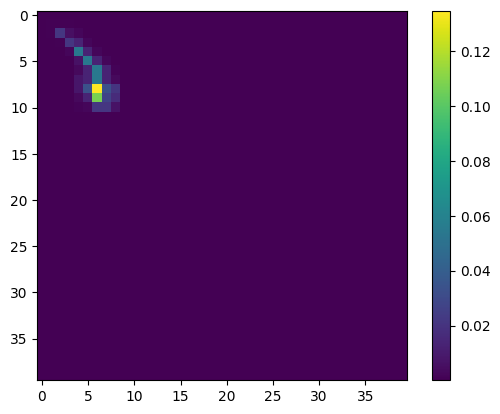

In [523]:
# kernel = [[.7],[.2],[.1]]
# prior = predict(posterior, 1, kernel)
prior = posterior.copy()
likelihood = lh_hallway(hallway, x=11, y=8, z_prob=.2)
posterior = update_array(likelihood, prior)

plt.imshow(posterior, interpolation="nearest", origin="upper")
plt.colorbar()
plt.show()

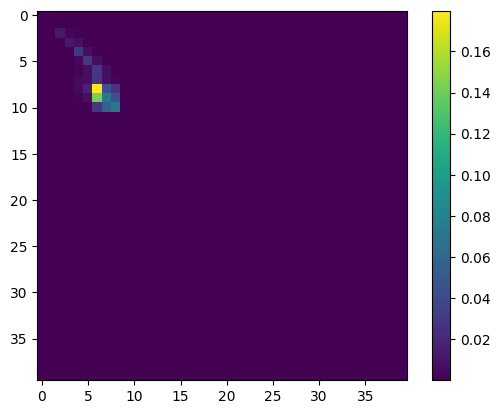

In [524]:
# kernel = [[.7],[.2],[.1]]
# prior = predict(posterior, 1, kernel)
prior = posterior.copy()
likelihood = lh_hallway(hallway, x=11, y=9, z_prob=.2)
posterior = update_array(likelihood, prior)

plt.imshow(posterior, interpolation="nearest", origin="upper")
plt.colorbar()
plt.show()

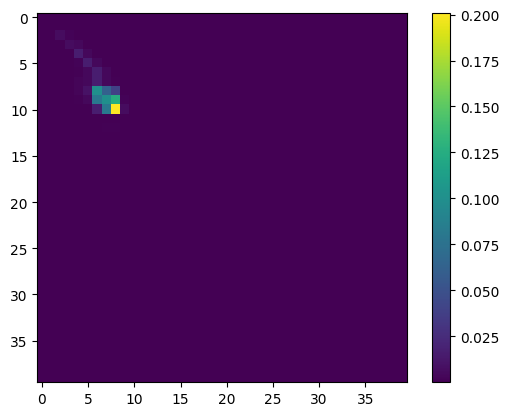

In [525]:
# kernel = [[.7],[.2],[.1]]
# prior = predict(posterior, 1, kernel)
prior = posterior.copy()
likelihood = lh_hallway(hallway, x=11, y=10, z_prob=.2)
posterior = update_array(likelihood, prior)

plt.imshow(posterior, interpolation="nearest", origin="upper")
plt.colorbar()
plt.show()

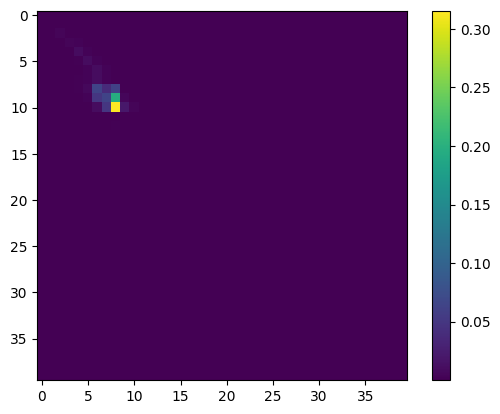

In [526]:
# kernel = [[.7],[.2],[.1]]
# prior = predict(posterior, 1, kernel)
prior = posterior.copy()
likelihood = lh_hallway(hallway, x=11, y=11, z_prob=.2)
posterior = update_array(likelihood, prior)

plt.imshow(posterior, interpolation="nearest", origin="upper")
plt.colorbar()
plt.show()

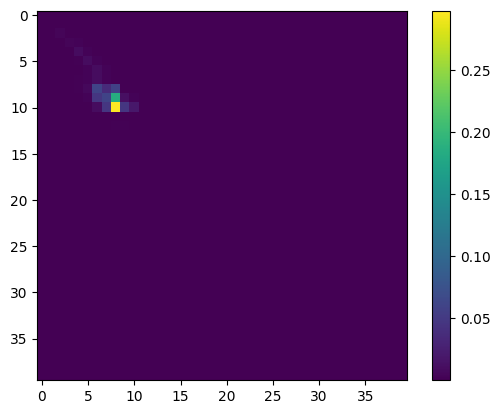

In [527]:
# kernel = [[.7],[.2],[.1]]
# prior = predict(posterior, 1, kernel)
prior = posterior.copy()
likelihood = lh_hallway(hallway, x=12, y=12, z_prob=.2)
posterior = update_array(likelihood, prior)

plt.imshow(posterior, interpolation="nearest", origin="upper")
plt.colorbar()
plt.show()

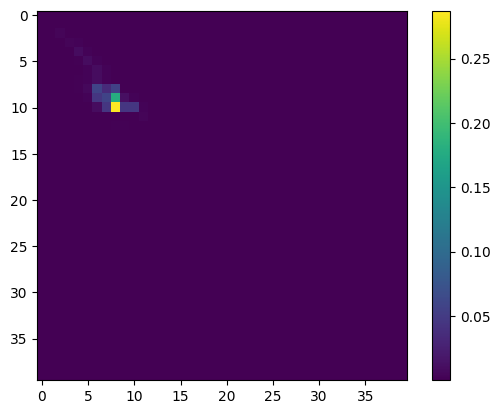

In [528]:
# kernel = [[.7],[.2],[.1]]
# prior = predict(posterior, 1, kernel)
prior = posterior.copy()
likelihood = lh_hallway(hallway, x=13, y=13, z_prob=.2)
posterior = update_array(likelihood, prior)

plt.imshow(posterior, interpolation="nearest", origin="upper")
plt.colorbar()
plt.show()

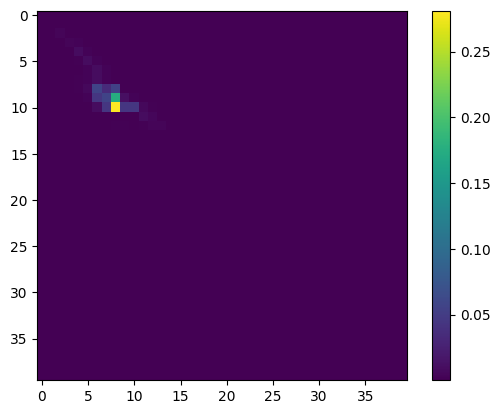

In [529]:
# kernel = [[.7],[.2],[.1]]
# prior = predict(posterior, 1, kernel)
prior = posterior.copy()
likelihood = lh_hallway(hallway, x=13, y=14, z_prob=.2)
posterior = update_array(likelihood, prior)

plt.imshow(posterior, interpolation="nearest", origin="upper")
plt.colorbar()
plt.show()

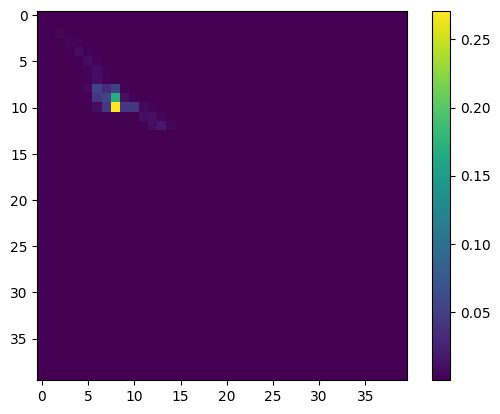

In [530]:
# kernel = [[.7],[.2],[.1]]
# prior = predict(posterior, 1, kernel)
prior = posterior.copy()
likelihood = lh_hallway(hallway, x=13, y=15, z_prob=.2)
posterior = update_array(likelihood, prior)

plt.imshow(posterior, interpolation="nearest", origin="upper")
plt.colorbar()
plt.show()

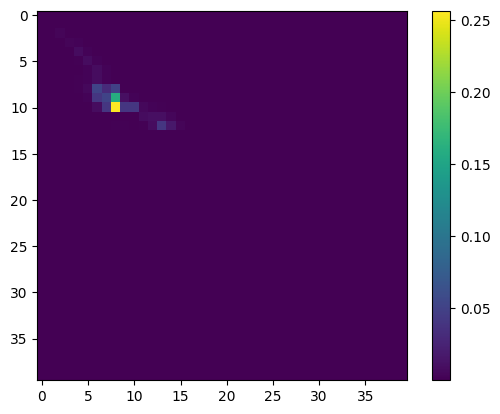

In [531]:
# kernel = [[.7],[.2],[.1]]
# prior = predict(posterior, 1, kernel)
prior = posterior.copy()
likelihood = lh_hallway(hallway, x=13, y=16, z_prob=.2)
posterior = update_array(likelihood, prior)

plt.imshow(posterior, interpolation="nearest", origin="upper")
plt.colorbar()
plt.show()

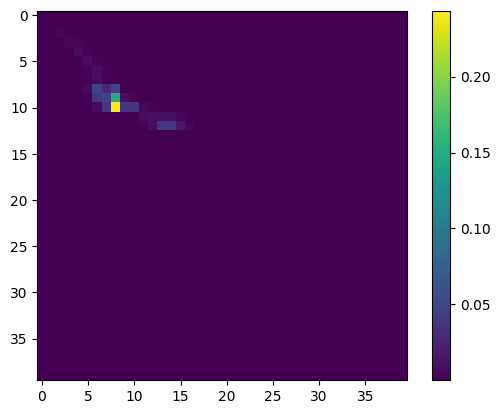

In [532]:
# kernel = [[.7],[.2],[.1]]
# prior = predict(posterior, 1, kernel)
prior = posterior.copy()
likelihood = lh_hallway(hallway, x=13, y=17, z_prob=.2)
posterior = update_array(likelihood, prior)

plt.imshow(posterior, interpolation="nearest", origin="upper")
plt.colorbar()
plt.show()

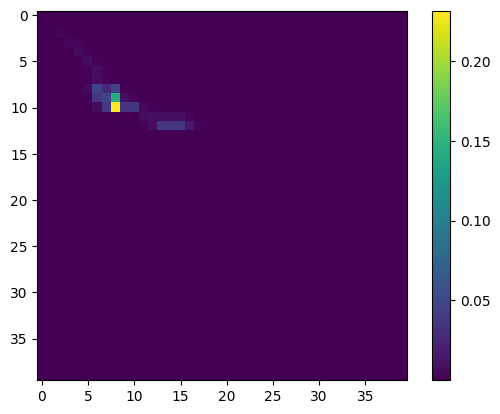

In [533]:
# kernel = [[.7],[.2],[.1]]
# prior = predict(posterior, 1, kernel)
prior = posterior.copy()
likelihood = lh_hallway(hallway, x=13, y=18, z_prob=.2)
posterior = update_array(likelihood, prior)

plt.imshow(posterior, interpolation="nearest", origin="upper")
plt.colorbar()
plt.show()

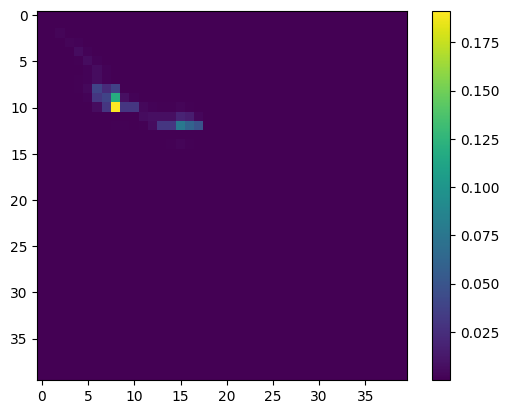

In [534]:
# kernel = [[.7],[.2],[.1]]
# prior = predict(posterior, 1, kernel)
prior = posterior.copy()
likelihood = lh_hallway(hallway, x=13, y=18, z_prob=.2)
posterior = update_array(likelihood, prior)

plt.imshow(posterior, interpolation="nearest", origin="upper")
plt.colorbar()
plt.show()

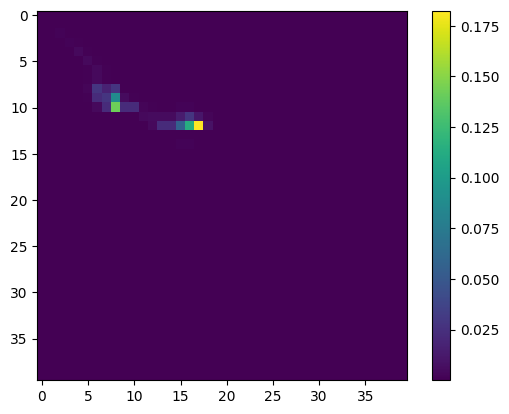

In [535]:
# kernel = [[.7],[.2],[.1]]
# prior = predict(posterior, 1, kernel)
prior = posterior.copy()
likelihood = lh_hallway(hallway, x=13, y=19, z_prob=.2)
posterior = update_array(likelihood, prior)

plt.imshow(posterior, interpolation="nearest", origin="upper")
plt.colorbar()
plt.show()

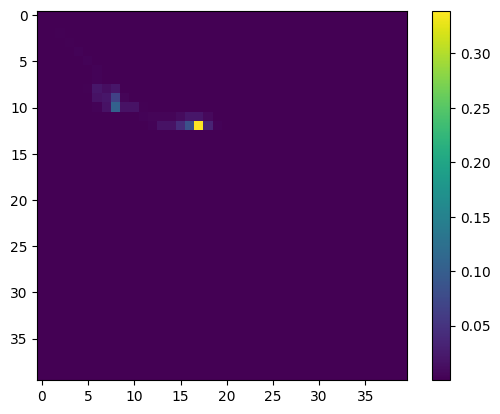

In [536]:
# kernel = [[.7],[.2],[.1]]
# prior = predict(posterior, 1, kernel)
prior = posterior.copy()
likelihood = lh_hallway(hallway, x=13, y=20, z_prob=.2)
posterior = update_array(likelihood, prior)

plt.imshow(posterior, interpolation="nearest", origin="upper")
plt.colorbar()
plt.show()

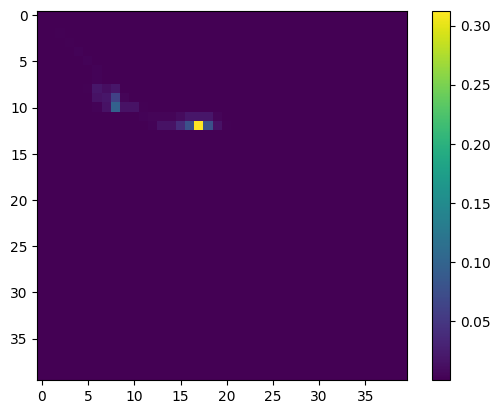

In [537]:
# kernel = [[.7],[.2],[.1]]
# prior = predict(posterior, 1, kernel)
prior = posterior.copy()
likelihood = lh_hallway(hallway, x=13, y=21, z_prob=.2)
posterior = update_array(likelihood, prior)

plt.imshow(posterior, interpolation="nearest", origin="upper")
plt.colorbar()
plt.show()

In [3]:
from collections import namedtuple
gaussian = namedtuple('Gaussian', ['mean', 'var'])
gaussian.__repr__ = lambda s: f'𝒩(μ={s[0]:.3f}, 𝜎²={s[1]:.3f})'

In [4]:
def update(prior, measurement):
    x, P = prior        # mean and variance of prior
    z, R = measurement  # mean and variance of measurement
    
    y = z - x        # residual
    K = P / (P + R)  # Kalman gain

    x = x + K*y      # posterior
    P = (1 - K) * P  # posterior variance
    return gaussian(x, P)

def predict(posterior, movement):
    x, P = posterior # mean and variance of posterior
    dx, Q = movement # mean and variance of movement
    x = x + dx
    P = P + Q
    return gaussian(x, P)

In [4]:
rc_1 = pd.read_csv('data know edge1.csv')
t2_p = rc_1['Topic3']
t3_p = rc_1['Distance']

In [5]:
t2 = list(t2_p)
# print(t2)
maximum = max(t2)
minimum = min(t2)
bins_1 = maximum - minimum
print(bins_1)

t3 = np.array(t2)
mean = np.mean(t2)
med = np.median(t2)
# med1 = statistics.median(t1)
mod = statistics.mode(t2)
pdf = statistics.pstdev(t2)
print(mean, med, mod, pdf)

44
-78.29815498154981 -80.0 -81 9.323601975174556


In [6]:
a = statistics.pstdev(t2[0:10])
a1 = statistics.stdev(t2[0:10])
a2 = statistics.variance(t2[0:10])

# b1 = np.mean(t3)
# b2 = np.median(t3)
# # med1 = statistics.median(t1)
# b3 = statistics.mode(t1)

print(a, a1, a2)
# print(b1, b2, b3)

1.2688577540449522 1.3374935098492586 1.788888888888889


KF on dB

In [7]:
temp_change = 0
# voltage_std = .13
voltage_std = 1.33
process_var = .05**2
# actual_voltage = 16.3

x = gaussian(25., 1000.) # initial state
process_model = gaussian(0., process_var)

N = 1355
# zs = [volt(actual_voltage, voltage_std) for i in range(N)]
zs = t2.copy()
ps = []
estimates = []

for z in zs:
    prior = predict(x, process_model)
    x = update(prior, gaussian(z, voltage_std**2))

    # save for latter plotting
    estimates.append(x.mean)
    ps.append(x.var)

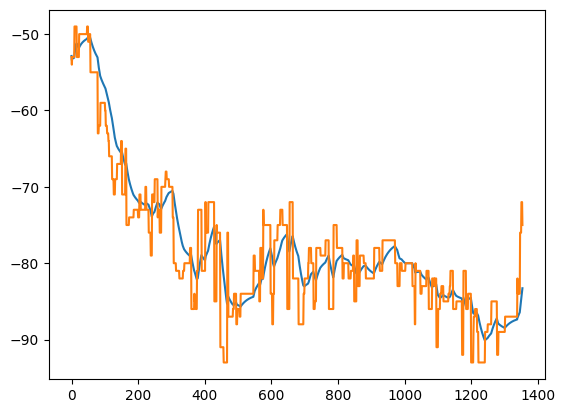

In [8]:
plt.plot(estimates)
plt.plot(zs)

save all filtered data on filtered.csv

In [193]:
# df = pd.read_csv('filtered.csv')
df = pd.DataFrame(estimates)
df.to_csv('filtered.csv')

In [61]:
t4 = list(t3_p)
# print(t2)
maximum = max(t4)
minimum = min(t4)
bins_2 = maximum - minimum
print(bins_2)

t5 = np.array(t4)
mean = np.mean(t4)
med = np.median(t4)
# med1 = statistics.median(t1)
mod = statistics.mode(t4)
pdf = statistics.pstdev(t4)
print(mean, med, mod, pdf)

19.63339229
4.536078471028044 3.383855153 3.87467512 4.123630379094399


In [126]:
a = statistics.pstdev(t4[0:50])
a1 = statistics.stdev(t4[0:50])
a2 = statistics.variance(t4[0:50])

# b1 = np.mean(t3)
# b2 = np.median(t3)
# # med1 = statistics.median(t1)
# b3 = statistics.mode(t1)

print(a, a1, a2)
# print(b1, b2, b3)

0.015335600332806284 0.015491295698419998 0.00023998024241588594


In [141]:
temp_change = 0
# voltage_std = .13
voltage_std = 3.12
process_var = .00024*2
# process_var = .05**2
# actual_voltage = 16.3

x = gaussian(0., 1000.) # initial state
process_model = gaussian(0., process_var)

N = 1355
# zs = [volt(actual_voltage, voltage_std) for i in range(N)]
zs = t4.copy()
ps = []
estimates = []

for z in zs:
    prior = predict(x, process_model)
    x = update(prior, gaussian(z, voltage_std**2))

    # save for latter plotting
    estimates.append(x.mean)
    ps.append(x.var)

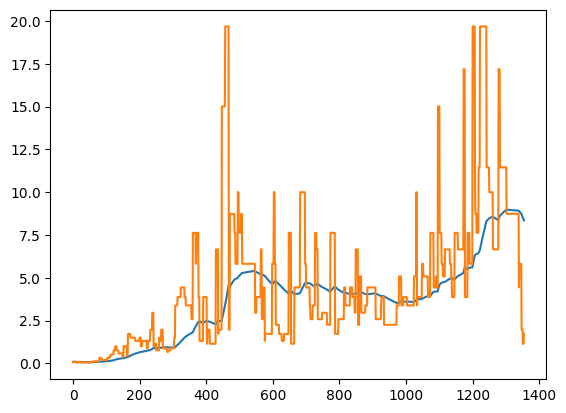

In [142]:
plt.plot(estimates)
plt.plot(zs)

KF on distance of filtered dB data

In [194]:
rc_2 = pd.read_csv('filtered.csv')
t4_p = rc_2['dis']

In [195]:
t6 = list(t4_p)
# print(t2)
maximum = max(t6)
minimum = min(t6)
bins_3 = maximum - minimum
print(bins_3)

t7 = np.array(t6)
mean = np.mean(t6)
med = np.median(t6)
# med1 = statistics.median(t1)
mod = statistics.mode(t6)
pdf = statistics.pstdev(t6)
print(mean, med, mod, pdf)

13.238888777
3.928826579065683 3.385671596 0.085718526 2.885174286661965


In [196]:
a = statistics.pstdev(t6[0:50])
a1 = statistics.stdev(t6[0:50])
a2 = statistics.variance(t6[0:50])

# b1 = np.mean(t3)
# b2 = np.median(t3)
# # med1 = statistics.median(t1)
# b3 = statistics.mode(t1)

print(a, a1, a2)
# print(b1, b2, b3)

0.008895177601620606 0.008985486288520887 8.073896384119686e-05


In [205]:
# temp_change = 0
# voltage_std = .13
voltage_std = 4.12
process_var = .0005*2
# process_var = .05**2
# actual_voltage = 16.3

x = gaussian(0., 1000.) # initial state
process_model = gaussian(0., process_var)

N = 1355
# zs = [volt(actual_voltage, voltage_std) for i in range(N)]
zs = t6.copy()
ps = []
estimates = []

for z in zs:
    prior = predict(x, process_model)
    x = update(prior, gaussian(z, voltage_std**2))

    # save for latter plotting
    estimates.append(x.mean)
    ps.append(x.var)

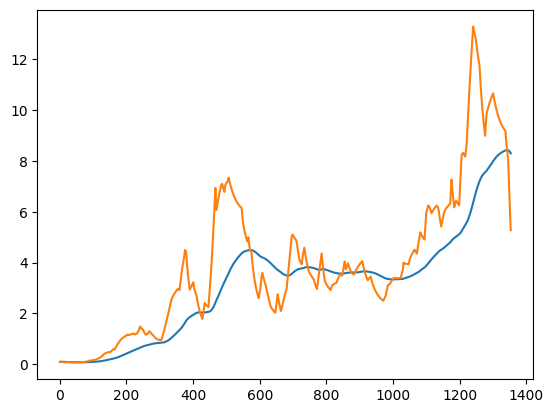

In [206]:
plt.plot(estimates)
plt.plot(zs)

KF on sensor when the tag is constant - 
Goal is to define the standard variation

In [5]:
rc_3 = pd.read_csv('data 1m anchor 1.csv')
t5_p = rc_3['Topic1']

In [4]:
t8 = list(t5_p)
# print(t2)
maximum = max(t8)
minimum = min(t8)
bins_4 = maximum - minimum
print(bins_4)

t9 = np.array(t8)
print(t9.shape)
mean = np.mean(t8)
med = np.median(t8)
# med1 = statistics.median(t1)
mod = statistics.mode(t8)
pdf = statistics.pstdev(t8)
print(mean, med, mod, pdf)

7
(149,)
-71.90604026845638 -73.0 -69 2.344040800316035


In [6]:
a = statistics.pstdev(t8[0:])
a1 = statistics.stdev(t8[0:])
a2 = statistics.variance(t8[0:])

# b1 = np.mean(t3)
# b2 = np.median(t3)
# # med1 = statistics.median(t1)
# b3 = statistics.mode(t1)

print(a, a1, a2)
# print(b1, b2, b3)

2.344040800316035 2.351946525290691 5.531652457826954


In [31]:
# temp_change = 0
# voltage_std = .13
voltage_std = 3.03
process_var = .001*2
# process_var = .05**2
# actual_voltage = 16.3

x = gaussian(-74, 1000.) # initial state
process_model = gaussian(0., process_var)

N = 149
# zs = [volt(actual_voltage, voltage_std) for i in range(N)]
zs = t8.copy()
ps = []
estimates = []

for z in zs:
    prior = predict(x, process_model)
    x = update(prior, gaussian(z, voltage_std**2))

    # save for latter plotting
    estimates.append(x.mean)
    ps.append(x.var)

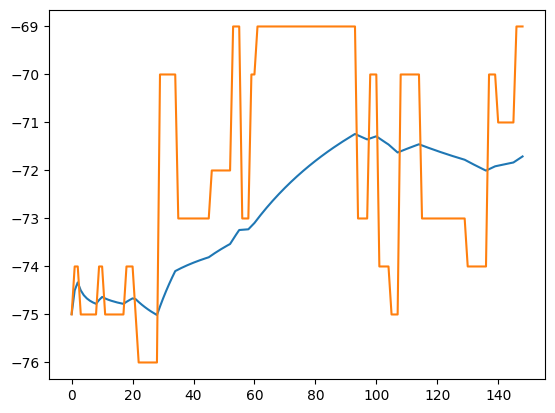

In [32]:
plt.plot(estimates)
plt.plot(zs)

winsorize on raw dB data with different stepsizes

In [13]:
rc_1 = pd.read_csv('data know edge1.csv')
t2_p = rc_1['Topic3']
t3_p = rc_1['Distance']
t2_p = list(t2_p)
# print(t2_p.shape)
print(len(t2_p))

1355


In [14]:
final = []
for i in range(0,1332,36):
    new = []
    for j in range(i,i+36):
        new.append(t2_p[j])
    new_winsor = winsorize(new, limits=[0.1, 0.2])
    final.extend(new_winsor)
new = []
for i in range(1332,1355):
    new.append(t2_p[j])
new_winsor = winsorize(new, limits=[0.1, 0.2])
final.extend(new_winsor)

In [15]:
print(len(final))
print(final[0:40])
print(t2_p[0:40])

1355
[-53, -53, -53, -53, -53, -53, -53, -53, -53, -50, -50, -50, -50, -50, -50, -50, -53, -53, -53, -53, -53, -53, -53, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50]
[-53, -54, -53, -53, -53, -53, -53, -53, -53, -49, -49, -49, -49, -49, -49, -49, -53, -53, -53, -53, -53, -53, -53, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50]


In [26]:
temp_change = 0
# voltage_std = .13
voltage_std = 2.35
process_var = .08**2
# actual_voltage = 16.3

x = gaussian(25., 1000.) # initial state
process_model = gaussian(0., process_var)

N = 1355
# zs = [volt(actual_voltage, voltage_std) for i in range(N)]
zs = final.copy()
ps = []
estimates = []

for z in zs:
    prior = predict(x, process_model)
    x = update(prior, gaussian(z, voltage_std**2))

    # save for latter plotting
    estimates.append(x.mean)
    ps.append(x.var)

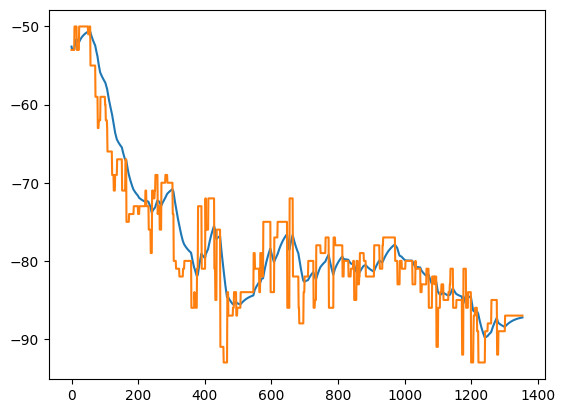

In [27]:
plt.plot(estimates)
plt.plot(zs)

Calculate distance of above filtered data and use KF on filtered distance data

In [165]:
df = pd.DataFrame(estimates)
df.to_csv('filtered1.csv')

In [12]:
rc_10 = pd.read_csv('filtered1.csv')
t10_p = rc_10['dis1']

In [167]:
temp_change = 0
# voltage_std = .13
voltage_std = 1.33
process_var = .01**2
# actual_voltage = 16.3

x = gaussian(25., 1000.) # initial state
process_model = gaussian(0., process_var)

N = 1355
# zs = [volt(actual_voltage, voltage_std) for i in range(N)]
zs = t10_p.copy()
ps = []
estimates = []

for z in zs:
    prior = predict(x, process_model)
    x = update(prior, gaussian(z, voltage_std**2))

    # save for latter plotting
    estimates.append(x.mean)
    ps.append(x.var)

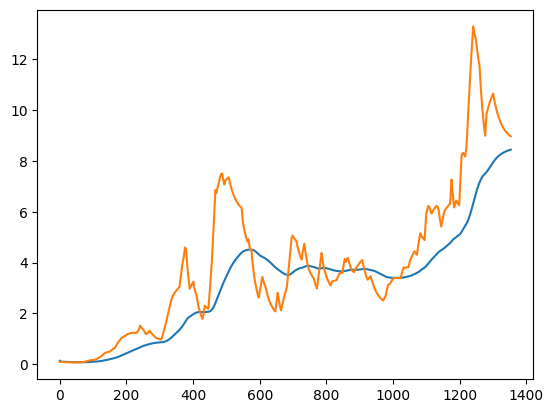

In [168]:
plt.plot(estimates)
plt.plot(zs)

In [120]:
final = []
for i in range(0,1300,100):
    new = []
    for j in range(i,i+100):
        new.append(t2_p[j])
    new_winsor = winsorize(new, limits=[0.3, 0.4])
    final.extend(new_winsor)
new = []
for i in range(1300,1355):
    new.append(t2_p[j])
new_winsor = winsorize(new, limits=[0.3, 0.4])
final.extend(new_winsor)

In [121]:
temp_change = 0
# voltage_std = .13
voltage_std = 2.33
process_var = .09**2
# actual_voltage = 16.3

x = gaussian(25., 1000.) # initial state
process_model = gaussian(0., process_var)

N = 1355
# zs = [volt(actual_voltage, voltage_std) for i in range(N)]
zs = final.copy()
ps = []
estimates = []

for z in zs:
    prior = predict(x, process_model)
    x = update(prior, gaussian(z, voltage_std**2))

    # save for latter plotting
    estimates.append(x.mean)
    ps.append(x.var)

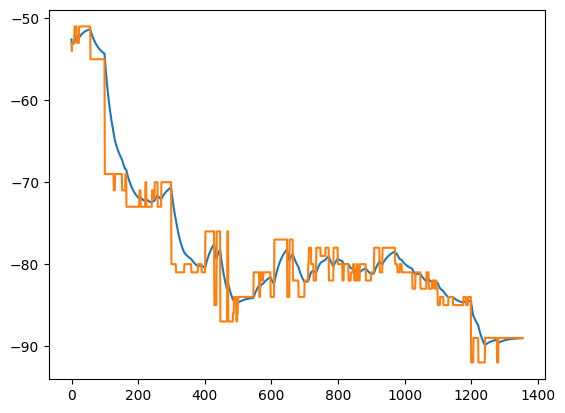

In [122]:
plt.plot(estimates)
plt.plot(zs)

In [124]:
final = []
for i in range(0,1300,100):
    new = []
    for j in range(i,i+100):
        new.append(t2_p[j])
    new_winsor = winsorize(new, limits=[0.5, 0.5])
    final.extend(new_winsor)
new = []
for i in range(1300,1355):
    new.append(t2_p[j])
new_winsor = winsorize(new, limits=[0.3, 0.4])
final.extend(new_winsor)

In [143]:
temp_change = 0
# voltage_std = .13
voltage_std = 2.33
process_var = 0.05**2
# actual_voltage = 16.3

x = gaussian(25., 1000.) # initial state
process_model = gaussian(0., process_var)

N = 1355
# zs = [volt(actual_voltage, voltage_std) for i in range(N)]
zs = final.copy()
ps = []
estimates = []

for z in zs:
    prior = predict(x, process_model)
    x = update(prior, gaussian(z, voltage_std**2))

    # save for latter plotting
    estimates.append(x.mean)
    ps.append(x.var)

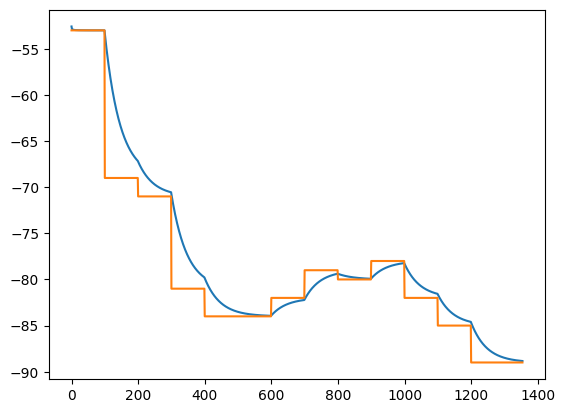

In [144]:
plt.plot(estimates)
plt.plot(zs)

In [123]:
print(final[400:500])

[-81, -81, -76, -76, -76, -76, -76, -76, -76, -76, -76, -76, -76, -76, -76, -76, -76, -76, -76, -76, -76, -76, -76, -76, -76, -76, -76, -76, -76, -85, -85, -85, -85, -85, -85, -85, -76, -76, -76, -76, -76, -76, -76, -76, -76, -76, -76, -87, -87, -87, -87, -87, -87, -87, -87, -87, -87, -87, -87, -87, -87, -87, -87, -87, -87, -87, -87, -87, -76, -76, -76, -87, -87, -87, -87, -87, -87, -87, -87, -87, -87, -87, -87, -87, -87, -86, -86, -86, -84, -84, -84, -84, -84, -84, -84, -87, -87, -87, -86, -86]


In [5]:
gaussian = namedtuple('Gaussian', ['mean', 'var'])
gaussian.__repr__ = lambda s: f'𝒩(μ={s[0]:.3f}, 𝜎²={s[1]:.3f})'

In [7]:
def update(prior, measurement):
    x, P = prior        # mean and variance of prior
    z, R = measurement  # mean and variance of measurement
    
    y = z - x        # residual
    K = P / (P + R)  # Kalman gain

    x = x + K*y      # posterior
    P = (1 - K) * P  # posterior variance
    return gaussian(x, P)

def predict(posterior, movement):
    x, P = posterior # mean and variance of posterior
    dx, Q = movement # mean and variance of movement
    x = x + dx
    P = P + Q
    return gaussian(x, P)

In [8]:
def kalman_filter(input, std, process_var):
    temp_change = 0
    # voltage_std = .13
    std = 1.33
    process_var = process_var**2
    # actual_voltage = 16.3

    x = gaussian(25., 1000.) # initial state
    process_model = gaussian(0., process_var)

    N = 1355
    # zs = [volt(actual_voltage, voltage_std) for i in range(N)]
    zs = input.copy()
    ps = []
    estimates = []

    for z in zs:
        prior = predict(x, process_model)
        x = update(prior, gaussian(z, std**2))

        # save for latter plotting
        estimates.append(x.mean)
        ps.append(x.var)
    return estimates

In [9]:
def winsor(input):
    final = []
    for i in range(0,2200,100):
        new = []
        for j in range(i,i+100):
            new.append(input[j])
        new_winsor = winsorize(new, limits=[0.3, 0.4])
        final.extend(new_winsor)
    new = []
    for i in range(2200,2288):
        new.append(input[j])
    new_winsor = winsorize(new, limits=[0.3, 0.4])
    final.extend(new_winsor)
    return final

In [10]:
def winsor_range(input,min,max,range1,range2,step):
    final = []
    for i in range(0,range1,step):
        new = []
        for j in range(i,i+step):
            new.append(input[j])
        new_winsor = winsorize(new, limits=[min, max])
        final.extend(new_winsor)
    new = []
    for i in range(range1,range2):
        new.append(input[j])
    new_winsor = winsorize(new, limits=[min, max])
    final.extend(new_winsor)
    return final

In [11]:
def dB_to_distance(input):
    topic_1_distance = []
    for i in range(len(input)):
        topic_1_distance.append(10**((-71-input[i])/17))
    return topic_1_distance

In [12]:
def dB_to_distance_ref(input,ref,ref2):
    topic_1_distance = []
    for i in range(len(input)):
        topic_1_distance.append(10**((-ref-input[i])/ref2))
    return topic_1_distance

In [267]:
read_csv = pd.read_csv('data circle around room2.csv')
topic_1 = read_csv['Topic1']
topic_2 = read_csv['Topic2']
topic_6 = read_csv['Topic6']

In [15]:
topic_1 = list(topic_1)
topic_2 = list(topic_2)

maximum = max(topic_1)
minimum = min(topic_1)
bins_1 = maximum - minimum
print(bins_1)

# t1_array = np.array(topic_1)
mean = np.mean(topic_1)
med = np.median(topic_1)

mod = statistics.mode(topic_1)
pdf = statistics.pstdev(topic_1)
print(mean, med, mod, pdf)

40
-77.68094405594405 -78.0 -77 6.807322298157781


In [16]:
pstdev_1 = statistics.pstdev(topic_1[10:20])
stdev_1 = statistics.stdev(topic_1[10:20])
var_1 = statistics.variance(topic_1[10:20])

print(pstdev_1, stdev_1, var_1)

0.458257569495584 0.48304589153964794 0.23333333333333334


In [17]:
estimates = kalman_filter(topic_1,1.33,0.05)

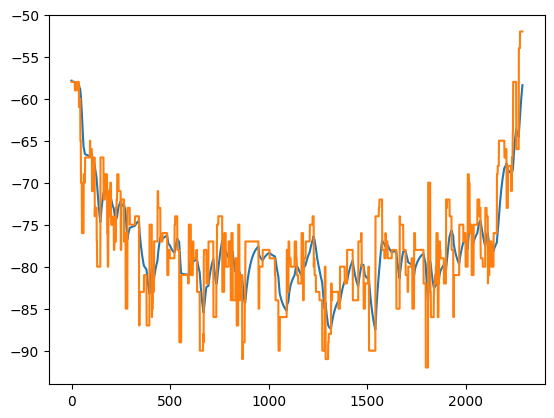

In [18]:
plt.plot(estimates)
plt.plot(topic_1)

winsorize on raw dB data with different stepsizes

In [19]:
print(len(topic_1))

2288


In [20]:
final = winsor(topic_1)

In [21]:
estimates = kalman_filter(final,1.33,0.05)

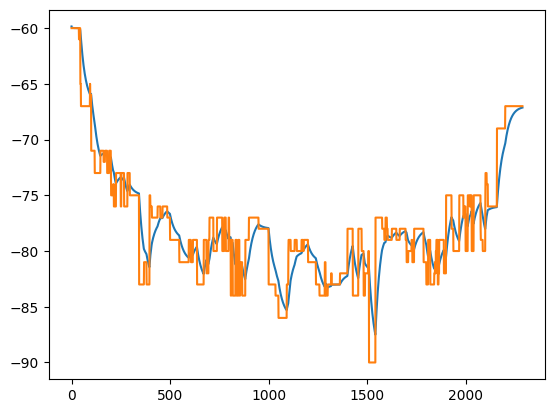

In [22]:
plt.plot(estimates)
plt.plot(final)

Calculate distance of above filtered data and use KF on filtered distance data

In [23]:
topic_1_distance = dB_to_distance(estimates)

In [24]:
final = winsor(topic_1_distance)

In [25]:
estimates = kalman_filter(final,1.33,0.015)

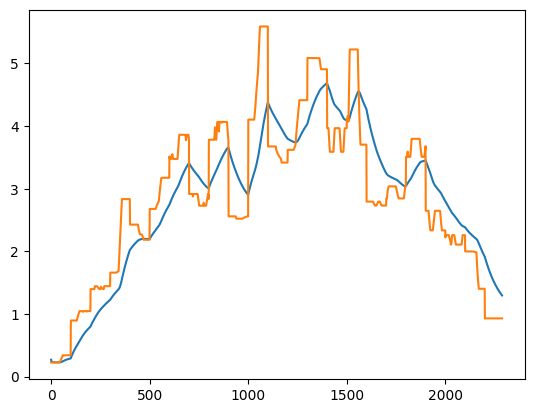

In [26]:
plt.plot(estimates)
plt.plot(final)

Real dB and distance before filtering

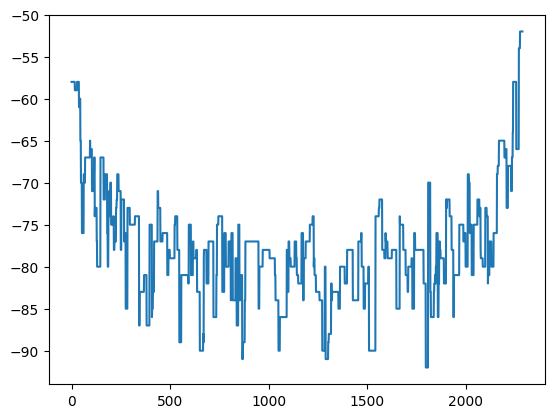

In [27]:
plt.plot(topic_1)

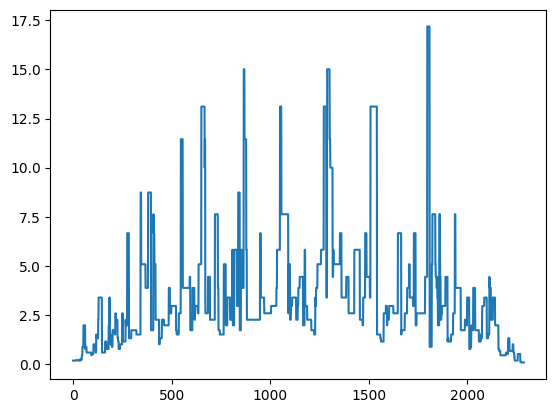

In [28]:
topic_1_distance = dB_to_distance(topic_1)
plt.plot(topic_1_distance)

In [29]:
final_2 = winsor(topic_2)
estimates_2 = kalman_filter(final_2,1.33,0.05)
topic_2_distance = dB_to_distance(estimates_2)
final_2 = winsor(topic_2_distance)
estimates_2 = kalman_filter(final_2,1.33,0.015)

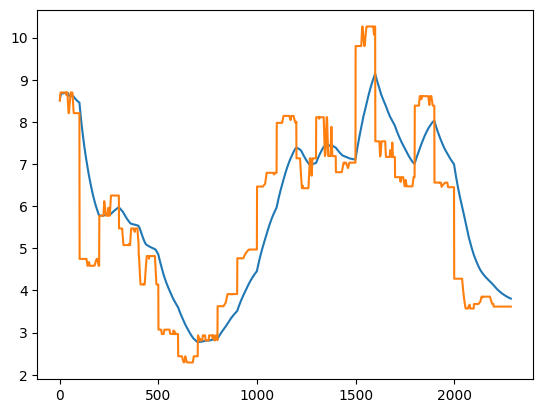

In [30]:
plt.plot(estimates_2)
plt.plot(final_2)

Topic 6

In [31]:
final_6 = winsor(topic_6)
estimates_6 = kalman_filter(final_6,1.33,0.05)
topic_6_distance = dB_to_distance(estimates_6)
final_6 = winsor(topic_6_distance)
estimates_6 = kalman_filter(final_6,1.33,0.015)

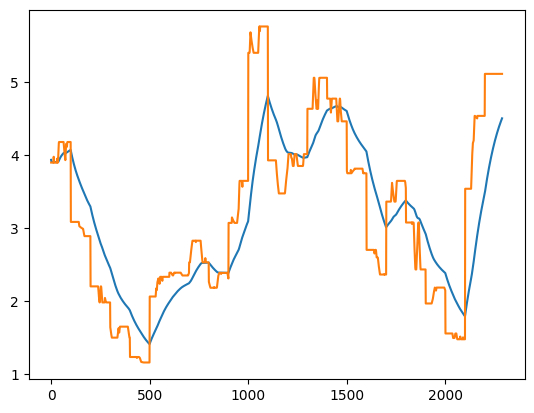

In [32]:
plt.plot(estimates_6)
plt.plot(final_6)

In [33]:
aa = 5.70
bb = estimates_2.copy()
cc = estimates.copy()

In [77]:
x_1_2 = []
y_1_2 = []
for i in range(len(estimates)):
    if (aa**2+bb[i]**2-cc[i]**2)/(2*aa) > aa:
        x_1_2.append(aa*(bb[i]/(bb[i]+cc[i])))  # normalized of x
    else:
        x_1_2.append((aa**2+bb[i]**2-cc[i]**2)/(2*aa))
   
    if bb[i]**2 < ((aa**2+bb[i]**2-cc[i]**2)/(2*aa))**2:
    # if bb[i]**2 < (x_1_2[i])**2:
        # y_1_2.append(aa)
        # y_1_2.append(math.sqrt(abs(bb[i]**2-((aa**2+bb[i]**2-cc[i]**2)/(2*aa))**2)))
        # y_1_2.append(math.sqrt(abs(bb[i]**2-x_1_2[i]**2)))
        y_1_2.append(math.sqrt(abs(aa**2-x_1_2[i]**2)))
    else:
        # y_1_2.append(math.sqrt(bb[i]**2-((aa**2+bb[i]**2-cc[i]**2)/(2*aa))**2))
        y_1_2.append(math.sqrt(bb[i]**2-(x_1_2[i])**2))
   
    # y_1_2.append(math.sqrt(bb[i]**2-(x_1_2[i])**2))

In [95]:
x_1_2 = []
y_1_2 = []

for i in range(len(estimates)):
    if (aa + bb[i] < cc[i]):
        cc[i] = max(aa,bb[i])
    elif (aa + cc[i] < bb[i]):
        # bb[i] = max(aa,cc[i])
        bb[i] = aa + cc[i]
    elif (cc[i] + bb[i] < aa):
        aa = max(bb[i],cc[i])

for i in range(len(estimates)):
    if (aa**2+bb[i]**2-cc[i]**2)/(2*aa) > aa:
        x_1_2.append(aa)
    else:
        x_1_2.append((aa**2+bb[i]**2-cc[i]**2)/(2*aa))
    # y_1_2.append(math.sqrt(bb[i]**2-((aa**2+bb[i]**2-cc[i]**2)/(2*aa))**2))
    y_1_2.append(math.sqrt(bb[i]**2-x_1_2[i]**2))


In [46]:
######### test
x_1_2 = []
y_1_2 = []
for i in range(len(estimates)):
    x_1_2.append((aa**2+bb[i]**2-cc[i]**2)/(2*aa))
    # if bb[i]**2 < ((aa**2+bb[i]**2-cc[i]**2)/(2*aa))**2:
    if bb[i]**2 < (x_1_2[i])**2:
        y_1_2.append(aa)
        # y_1_2.append(math.sqrt(abs(bb[i]**2-((aa**2+bb[i]**2-cc[i]**2)/(2*aa))**2)))
        # y_1_2.append(math.sqrt(abs(bb[i]**2-x_1_2[i]**2)))
    else:
        # y_1_2.append(math.sqrt(bb[i]**2-((aa**2+bb[i]**2-cc[i]**2)/(2*aa))**2))
        y_1_2.append(math.sqrt(bb[i]**2-(x_1_2[i])**2))

In [96]:
print(x_1_2[0],y_1_2[0])
print(bb[0],cc[0])

4.005483206939183 4.425529784830432
5.969020824012351 0.26902082401235106


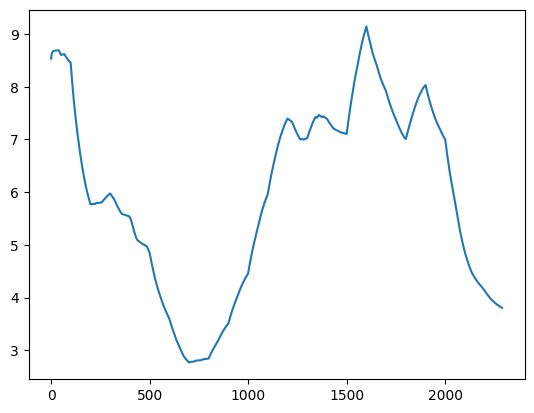

In [80]:
# plt.plot(bb,cc)  # plot based on distance of tag with sensor one and two
# plt.plot(x_1_2,y_1_2)
plt.plot(bb)

for topic 6 formulation are different

In [102]:
aa = 4
bb = estimates_6.copy()
cc = estimates.copy()

In [103]:
x_1_6 = []
y_1_6 = []
for i in range(len(estimates)):
    x_1_6.append((aa**2+bb[i]**2-cc[i]**2)/(2*aa))
    if bb[i]**2 < ((aa**2+bb[i]**2-cc[i]**2)/(2*aa))**2:
        # y_1_2.append(aa)
        y_1_6.append(math.sqrt(abs(bb[i]**2-((aa**2+bb[i]**2-cc[i]**2)/(2*aa))**2)))
    else:
        y_1_6.append(math.sqrt(bb[i]**2-((aa**2+bb[i]**2-cc[i]**2)/(2*aa))**2))

In [104]:
print(x_1_6[0],y_1_6[0])
print(bb[0],cc[0])

3.926620765280956 0.258819805394275
3.935141462006154 0.26902082401235106


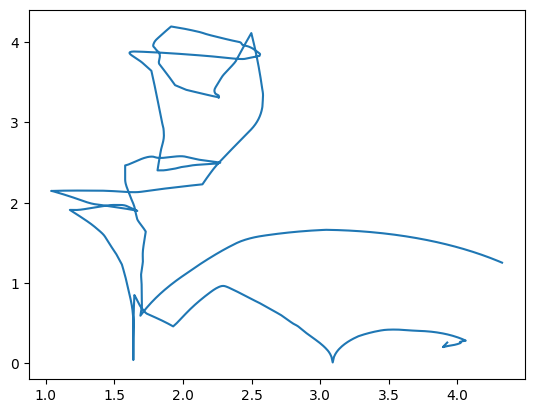

In [106]:
# plt.plot(bb,cc)  # plot based on distance of tag with sensor one and two
plt.plot(x_1_6,y_1_6)
# plt.plot(bb)

In [5]:
read_csv = pd.read_csv('data circle around room 3 (change position anchor).csv')
topic_1 = read_csv['Topic1']
topic_2 = read_csv['Topic2']
topic_3 = read_csv['Topic3']
topic_4 = read_csv['Topic4']
topic_5 = read_csv['Topic5']
topic_6 = read_csv['Topic6']

In [35]:
final_1 = winsor(topic_1)
estimates_1 = kalman_filter(final_1,1.33,0.05)
topic_1_distance = dB_to_distance(estimates_1)
final_1 = winsor(topic_1_distance)
estimates_1 = kalman_filter(final_1,1.33,0.015)

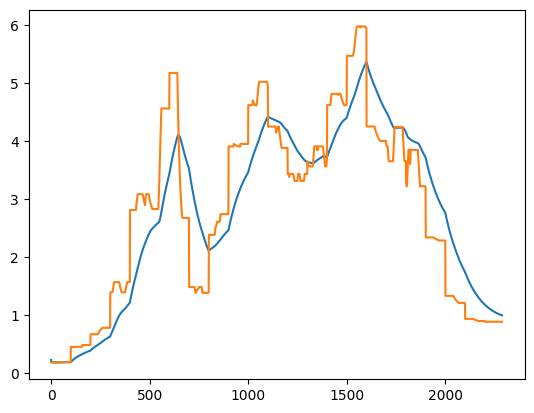

In [36]:
plt.plot(estimates_1)
plt.plot(final_1)

In [37]:
final_6 = winsor(topic_6)
estimates_6 = kalman_filter(final_6,1.33,0.05)
topic_6_distance = dB_to_distance(estimates_6)
final_6 = winsor(topic_6_distance)
estimates_6 = kalman_filter(final_6,1.33,0.015)

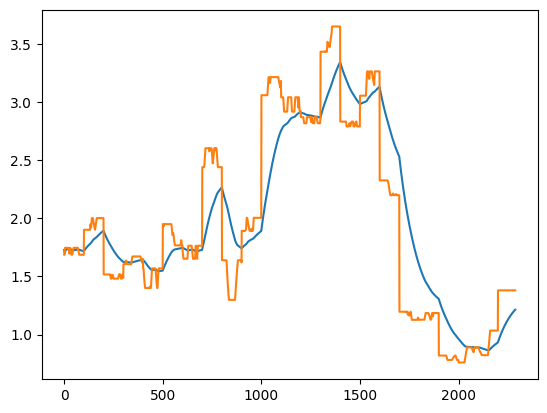

In [38]:
plt.plot(estimates_6)
plt.plot(final_6)

In [39]:
aa = 2.95
bb = estimates_6.copy()
cc = estimates_1.copy()

In [133]:
x_1_6 = []
y_1_6 = []
for i in range(len(estimates_1)):
    x_1_6.append(aa - (aa**2+bb[i]**2-cc[i]**2)/(2*aa))
    y_1_6.append(math.sqrt(abs(bb[i]**2-((aa**2+bb[i]**2-cc[i]**2)/(2*aa))**2)))

In [134]:
print(x_1_6[0],y_1_6[0])
print(bb[0],cc[0])

0.9773691639057862 0.9520883987869074
1.7276574013400747 0.2208577901032207


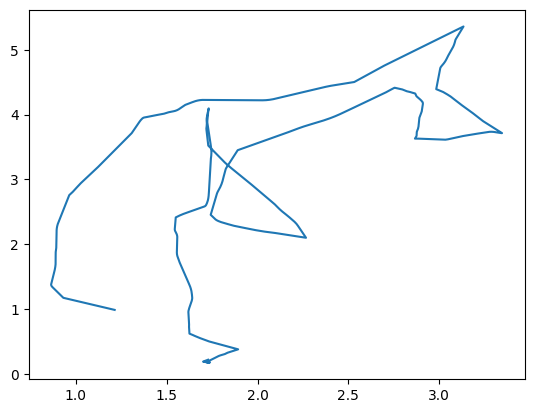

In [135]:
# plt.plot(x_1_6,y_1_6)
plt.plot(bb,cc)

For corridor with 4 sensors

In [13]:
read_csv = pd.read_csv('data halway Square (Reza).csv')
topic_1 = read_csv['Topic1']
topic_2 = read_csv['Topic2']
topic_3 = read_csv['Topic3']
topic_4 = read_csv['Topic4']

In [14]:
def winsor(input):
    final = []
    for i in range(0,160,10):
        new = []
        for j in range(i,i+10):
            new.append(input[j])
        new_winsor = winsorize(new, limits=[0.3, 0.4])
        final.extend(new_winsor)
    new = []
    for i in range(160,163):
        new.append(input[j])
    new_winsor = winsorize(new, limits=[0.3, 0.4])
    final.extend(new_winsor)
    return final

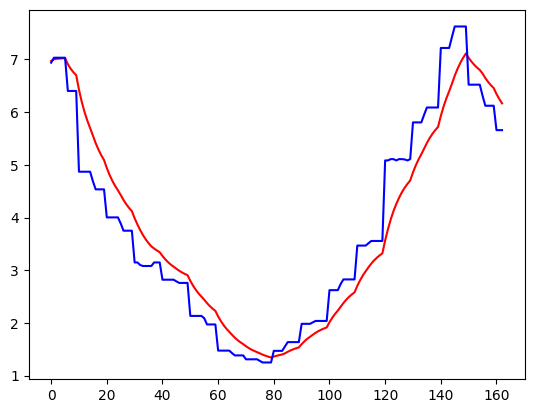

In [15]:
# final_1 = winsor(topic_1)
final_1 = winsor_range(topic_1,0.2,0.3,160,163,10)
estimates_1 = kalman_filter(final_1,1.33,0.1)
topic_1_distance = dB_to_distance_ref(estimates_1,72.5,17)
final_1 = winsor(topic_1_distance)
estimates_1 = kalman_filter(final_1,1.7,0.2)
plt.plot(estimates_1, 'r')
plt.plot(final_1, 'b')

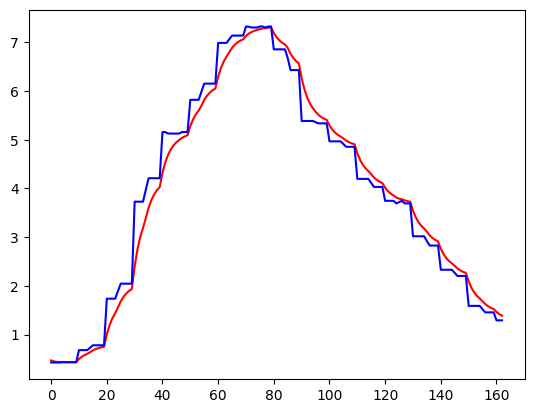

In [16]:
final_2 = winsor(topic_2)
estimates_2 = kalman_filter(final_2,1.33,0.05)
topic_2_distance = dB_to_distance_ref(estimates_2,68.5,17)
final_2 = winsor(topic_2_distance)
estimates_2 = kalman_filter(final_2,1.7,0.4)
plt.plot(estimates_2, 'r')
plt.plot(final_2, 'b')

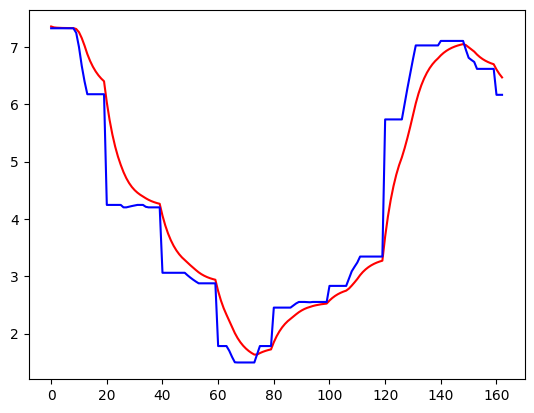

In [17]:
final_3 = winsor_range(topic_3,0.3,0.4,160,163,20)
estimates_3 = kalman_filter(final_3,1.33,0.1)
topic_3_distance = dB_to_distance_ref(estimates_3,71,12.5)
# final_3 = winsor(topic_3_distance)
final_3 = winsor_range(topic_3_distance,0.3,0.4,160,163,20)
estimates_3 = kalman_filter(final_3,1.7,0.25)
plt.plot(estimates_3, 'r')
plt.plot(final_3, 'b')

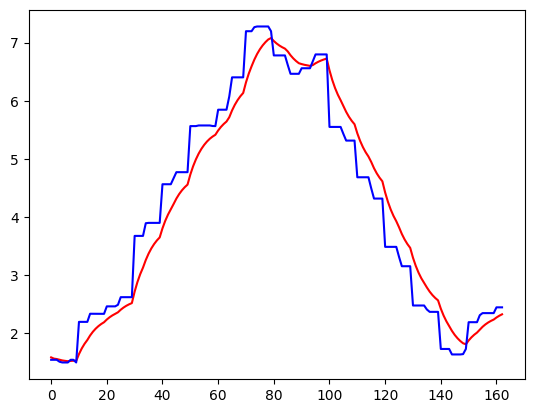

In [18]:
# final_4 = winsor(topic_4)
final_4 = winsor_range(topic_4,0.3,0.4,160,163,5)
estimates_4 = kalman_filter(final_4,1.33,0.05)
topic_4_distance = dB_to_distance_ref(estimates_4,69,16.5)
# final_4 = winsor(topic_4_distance)
final_4 = winsor_range(topic_4_distance,0.3,0.4,160,163,10)
estimates_4 = kalman_filter(final_4,1.3,0.25)
plt.plot(estimates_4, 'r')
plt.plot(final_4, 'b')

In [19]:
aa = 7.2
bb = estimates_4.copy()
cc = estimates_1.copy()

In [17]:
x_1_2 = []
y_1_2 = []
for i in range(len(estimates_1)):
    if (aa**2+bb[i]**2-cc[i]**2)/(2*aa) > aa:
        x_1_2.append(aa*(bb[i]/(bb[i]+cc[i])))  # normalized of x
    else:
        x_1_2.append((aa**2+bb[i]**2-cc[i]**2)/(2*aa))
   
    if bb[i]**2 < ((aa**2+bb[i]**2-cc[i]**2)/(2*aa))**2:
    # if bb[i]**2 < (x_1_2[i])**2:
        # y_1_2.append(aa)
        # y_1_2.append(math.sqrt(abs(bb[i]**2-((aa**2+bb[i]**2-cc[i]**2)/(2*aa))**2)))
        # y_1_2.append(math.sqrt(abs(bb[i]**2-x_1_2[i]**2)))
        y_1_2.append(math.sqrt(abs(aa**2-x_1_2[i]**2)))
    else:
        # y_1_2.append(math.sqrt(bb[i]**2-((aa**2+bb[i]**2-cc[i]**2)/(2*aa))**2))
        y_1_2.append(math.sqrt(bb[i]**2-(x_1_2[i])**2))
   
    # y_1_2.append(math.sqrt(bb[i]**2-(x_1_2[i])**2))

In [20]:
x_1_2 = []
y_1_2 = []

for i in range(len(estimates_1)):
    if (aa + bb[i] < cc[i]):
        cc[i] = max(aa,bb[i])
    elif (aa + cc[i] < bb[i]):
        # bb[i] = max(aa,cc[i])
        bb[i] = aa + cc[i]
    elif (cc[i] + bb[i] < aa):
        aa = max(bb[i],cc[i])

for i in range(len(estimates_1)):
    if (aa**2+bb[i]**2-cc[i]**2)/(2*aa) > aa:
        x_1_2.append(aa)
    else:
        x_1_2.append((aa**2+bb[i]**2-cc[i]**2)/(2*aa))
    # y_1_2.append(math.sqrt(bb[i]**2-((aa**2+bb[i]**2-cc[i]**2)/(2*aa))**2))
    y_1_2.append(math.sqrt(bb[i]**2-x_1_2[i]**2))

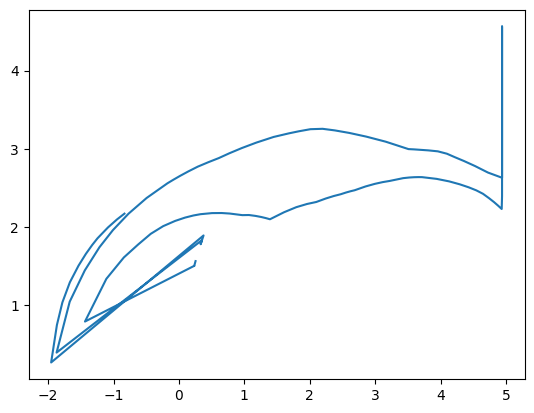

In [21]:
plt.plot(x_1_2,y_1_2)

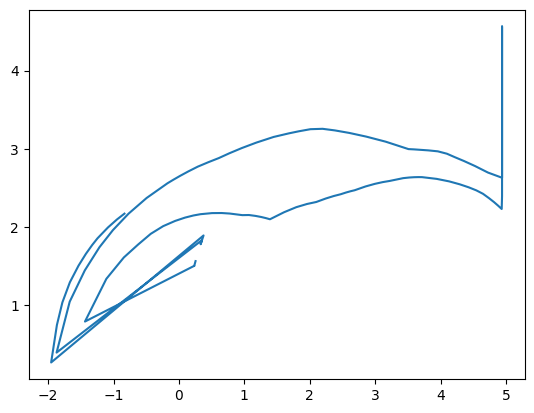

In [22]:
plt.plot(x_1_2,y_1_2)

In [23]:
x_1_6 = []
y_1_6 = []
for i in range(len(estimates_1)):
    if (aa + bb[i] < cc[i]):
        aa[i] = aa[i-1]
        bb[i] = bb[i-1]
    elif (aa + cc[i] < bb[i]):
        cc[i] = cc[i-1]
        aa[i] = aa[i-1]
    elif (cc[i] + bb[i] < aa):
        cc[i] = cc[i-1]
        bb[i] = bb[i-1]
for i in range(len(estimates_1)):
    x_1_6.append((aa**2+bb[i]**2-cc[i]**2)/(2*aa))
    if bb[i]**2 < ((aa**2+bb[i]**2-cc[i]**2)/(2*aa))**2:
        # y_1_2.append(aa)
        y_1_6.append(math.sqrt(abs(bb[i]**2-((aa**2+bb[i]**2-cc[i]**2)/(2*aa))**2)))
        # print(i)
    else:
        y_1_6.append(math.sqrt(bb[i]**2-((aa**2+bb[i]**2-cc[i]**2)/(2*aa))**2))

In [24]:
x_1_6 = []
y_1_6 = []
for i in range(len(estimates_1)):
    if (aa + bb[i] < cc[i]):
        aa[i] = aa[i-1]
        bb[i] = bb[i-1]
    elif (aa + cc[i] < bb[i]):
        cc[i] = cc[i-1]
        aa[i] = aa[i-1]
    elif (cc[i] + bb[i] < aa):
        cc[i] = cc[i-1]
        bb[i] = bb[i-1]
for i in range(len(estimates_1)):
    x_1_6.append((aa**2+bb[i]**2-cc[i]**2)/(2*aa))
    if bb[i]**2 < ((aa**2+bb[i]**2-cc[i]**2)/(2*aa))**2:
        # y_1_2.append(aa)
        y_1_6.append(math.sqrt(abs(bb[i]**2-((aa**2+bb[i]**2-cc[i]**2)/(2*aa))**2)))
        # print(i)
    else:
        y_1_6.append(math.sqrt(bb[i]**2-((aa**2+bb[i]**2-cc[i]**2)/(2*aa))**2))

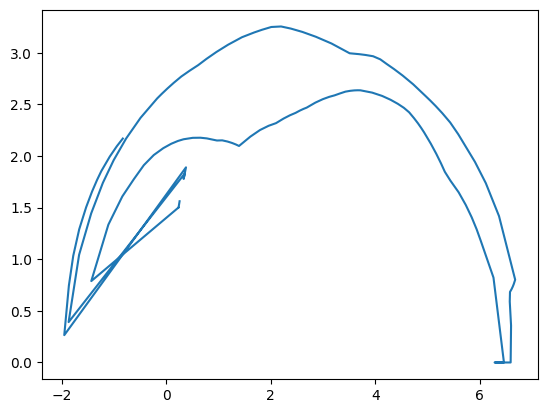

In [25]:
plt.plot(x_1_6,y_1_6)

In [20]:
aa = 7.2
bb = estimates_4.copy()
cc = estimates_1.copy()

In [21]:
x_1_6 = []
y_1_6 = []
for i in range(len(estimates_1)):
    if (aa + bb[i] < cc[i]):
        bb[i] = bb[i-1]
    elif (aa + cc[i] < bb[i]):
        cc[i] = cc[i-1]
    elif (cc[i] + bb[i] < aa):
        cc[i] = cc[i-1]
        bb[i] = bb[i-1]
for i in range(len(estimates_1)):
    x_1_6.append((aa**2+bb[i]**2-cc[i]**2)/(2*aa))
    y_1_6.append(math.sqrt(bb[i]**2-((aa**2+bb[i]**2-cc[i]**2)/(2*aa))**2))

In [22]:
x_1 = y_1_6.copy()
y_1 = x_1_6.copy()

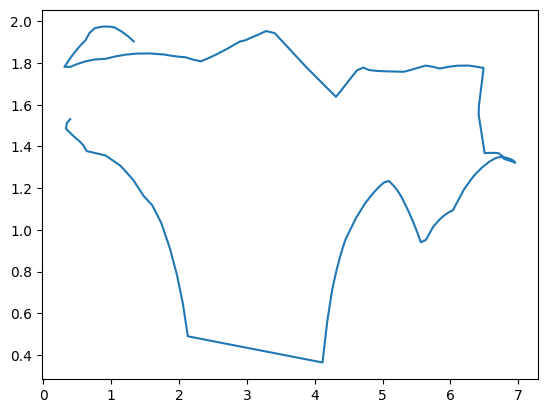

In [23]:
plt.plot(x_1_6,y_1_6)

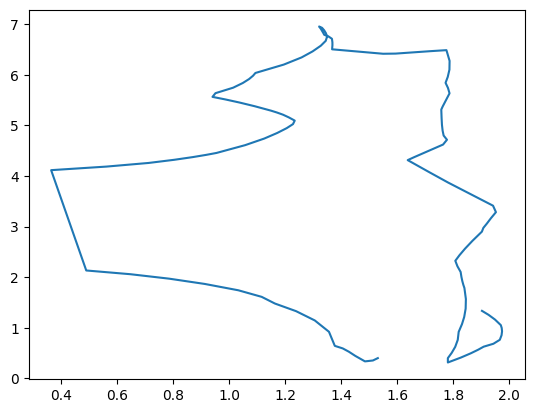

In [24]:
plt.plot(x_1,y_1)

In [25]:
aa = 7.2
bb = estimates_3.copy()
cc = estimates_2.copy()

In [26]:
x_1_6 = []
y_1_6 = []
for i in range(len(estimates_1)):
    if (aa + bb[i] < cc[i]):
        bb[i] = bb[i-1]
    elif (aa + cc[i] < bb[i]):
        cc[i] = cc[i-1]
    elif (cc[i] + bb[i] < aa):
        cc[i] = cc[i-1]
        bb[i] = bb[i-1]
for i in range(len(estimates_1)):
    x_1_6.append((aa**2+bb[i]**2-cc[i]**2)/(2*aa))
    y_1_6.append(math.sqrt(bb[i]**2-((aa**2+bb[i]**2-cc[i]**2)/(2*aa))**2))

In [27]:
x_2 = y_1_6.copy()
for i in range(len(x_2)):
    x_2[i] = 3 - x_2[i]
y_2 = x_1_6.copy()
for i in range(len(y_2)):
    y_2[i] = 7.2 - y_2[i]

In [28]:
print(x_1_6[0],y_1_6[0])

7.343887150596278 0.44756502961914746


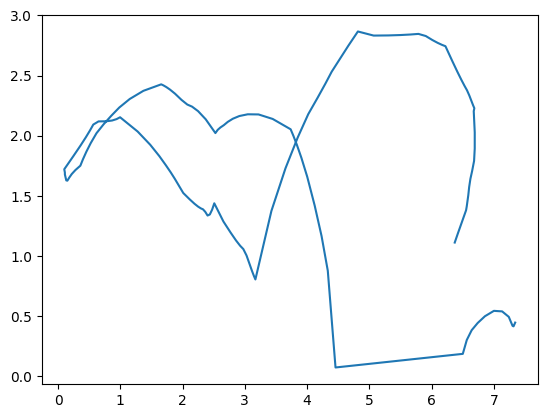

In [29]:
plt.plot(x_1_6,y_1_6)

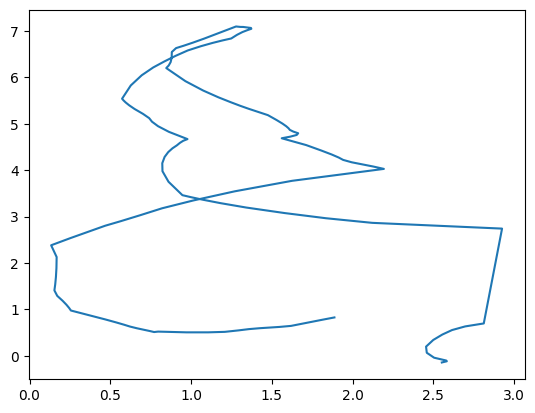

In [30]:
plt.plot(x_2,y_2)

In [31]:
aa = 3
bb = estimates_2.copy()
cc = estimates_4.copy()

In [32]:
x_1_6 = []
y_1_6 = []
for i in range(len(estimates_1)):
    if (aa + bb[i] < cc[i]):
        bb[i] = bb[i-1]
    elif (aa**2 + bb[i]**2 < cc[i]**2):
        cc[i] = cc[i-1]
        bb[i] = bb[i-1]
    elif (aa + cc[i] < bb[i]):
        cc[i] = cc[i-1]
    elif (cc[i] + bb[i] < aa):
        cc[i] = cc[i-1]
        bb[i] = bb[i-1]
for i in range(len(estimates_1)):
    x_1_6.append((aa**2+bb[i]**2-cc[i]**2)/(2*aa))
    y_1_6.append(math.sqrt(bb[i]**2-((aa**2+bb[i]**2-cc[i]**2)/(2*aa))**2))

In [33]:
x_3 = x_1_6.copy()
for i in range(len(x_3)):
    x_3[i] = 3 - x_3[i]
    if x_3[i] < 0:
        x_3[i] = x_3[i-1]
y_3 = y_1_6.copy()

In [34]:
print(x_1_6[30],y_1_6[30])

1.231129784098211 2.059425428707367


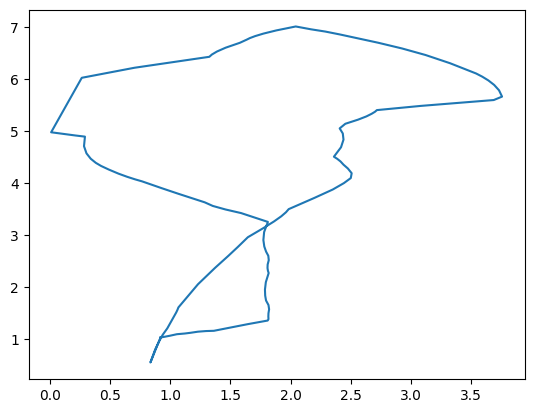

In [35]:
plt.plot(x_1_6,y_1_6)

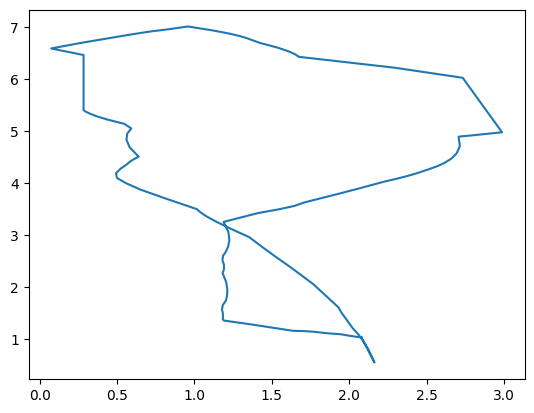

In [36]:
plt.plot(x_3,y_3)